Open:     http://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.28382&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Playground Exercises
### A first neural network 

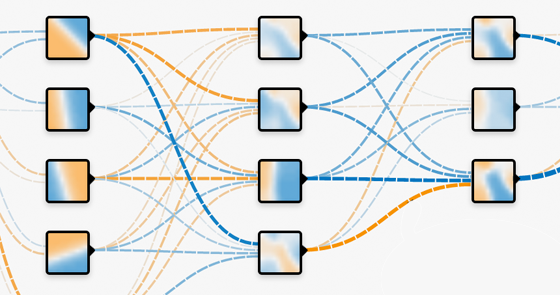




**Question 1** : The model as given combines our two input features into a single neuron. Will this model learn any nonlinearities? Run it to confirm your guess.

**Question 2**: Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities?

**Question 3**: Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of nodes and layers you can use that gives test loss of 0.177 or lower?

Open: http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=3&seed=0.09963&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

### Neural Net Initializations

**Question 1**: Run the model as given four or five times. Before each trial, hit the Reset the network button to get a new random initialization. (The Reset the network button is the circular reset arrow just to the left of the Play button.) Let each trial run for at least 500 steps to ensure convergence. What shape does each model output converge to? What does this say about the role of initialization in non-convex optimization?

**Question 2**: Try making the model slightly more complex by adding a layer and a couple of extra nodes. Repeat the trials from Question 1. Does this add any additional stability to the results?

## Build a neural network with IMDB data
**The IMDB Data Set**

The imdb sentiment classification dataset consists of 50,000 movie reviews from imdb users that are labeled as either positive (1) or negative (0). The reviews are preprocessed and each one is encoded as a sequence of word indexes in the form of integers. The words within the reviews are indexed by their overall frequency within the dataset. For example, the integer “2” encodes the second most frequent word in the data. The 50,000 reviews are split into 25,000 for training and 25,000 for testing.

Import the required dependencies to preprocess our data and to build our model :

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

Download the imdb dataset, which is already built into Keras. Since we don’t want to have a 50/50 train test split, we will immediately merge the data into data and targets after downloading, so that we can do an 80/20 split later on.

In [3]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [4]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173.0


You can see in the output above that the dataset is labeled into two categories, either 0 or 1, which represents the sentiment of the review. The whole dataset contains 9998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

Now we will look at a single training example:

In [41]:
print("Label:", targets[0])

Label: 1


In [42]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Above you see the first review of the dataset which is labeled as positive (1). The code below retrieves the dictionary mapping word indices back into the original words so that we can read them. It replaces every unknown word with a “#”. It does this by using the get_word_index() function.



In [43]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Data Preparation
Now it is time to prepare our data. We will vectorize every review and fill it with zeros so that it contains exactly 10,000 numbers. That means we fill every review that is shorter than 10,000 with zeros. We do this because the biggest review is nearly that long and every input for our neural network needs to have the same size. We also transform the targets into floats.

In [47]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

**Question 1: Split the data into a training and a testing set.** The training set will contain 40,000 reviews and the testing set 10,000.



**Question 2: Building and Training the Model**

We can now build our simple Neural Network. We start by defining the type of model we want to build. There are two types of models available in Keras: the Sequential model and the Model class used with functional API.

Then, simply add the input-, hidden- and output-layers. Between them, we are using dropout to prevent overfitting. Note that you should always use a dropout rate between 20% and 50%. At every layer, we use “Dense” which means that the units are fully connected. Within the hidden-layers, we use the relu function, because this is always a good start and yields a satisfactory result most of the time. Feel free to experiment with other activation functions. And at the output-layer, we use the sigmoid function, which maps the values between 0 and 1. Note that we set the input-shape to 10,000 at the input-layer, because our reviews are 10,000 integers long. The input-layer takes 10,000 as input and outputs it with a shape of 50.

Lastly,  let Keras print a summary of the model you will build.

**Question 3: Compile the model.** Compiling is nothing but configuring the model for training. Use the “adam” optimizer. The optimizer is the algorithm that changes the weights and biases during training. Also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

**Question 4: Now, train your model.**
Do this with a batch_size of 500 and only for two epochs because  the model overfits if you train it longer. 

The Batch size defines the number of samples that will be propagated through the network and an epoch is an iteration over the entire training data. In general a larger batch-size results in faster training, but don’t always converges fast. 

A smaller batch-size is slower in training but it can converge faster. This is definitely problem dependent and you need to try out a few different values.



**Question 5: Evaluate your model** 